In [1]:
import gym
import sys
import numpy as np
import bottleneck as bn
import matplotlib.pyplot as plt

from gym import error, spaces, utils
from copy import deepcopy


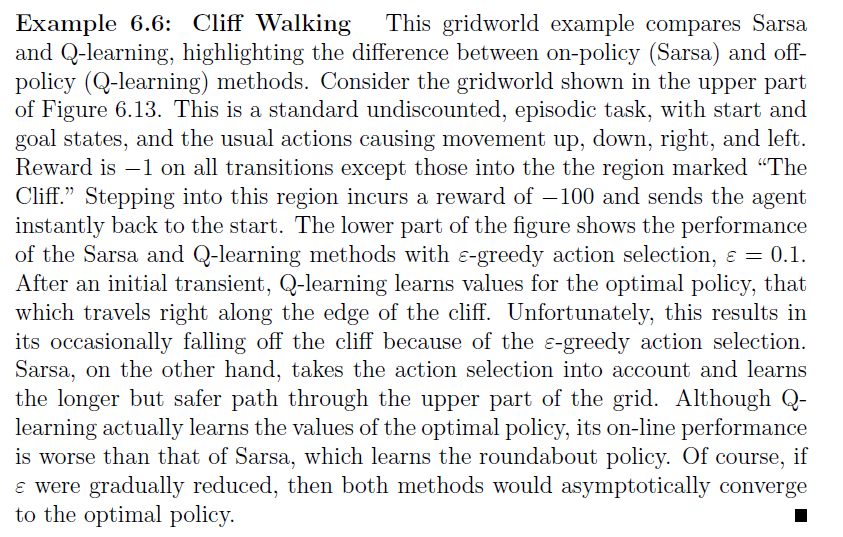

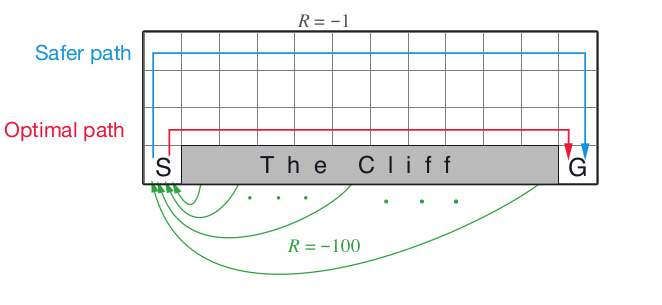

# Specifying the Environment

REFERENCES FOR ENVIRONMENT CODE:

https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

https://github.com/caburu/gym-cliffwalking/blob/master/gym_cliffwalking/envs/cliffwalking_env.py

https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py

I pieced together code from the above, and modified it for clarity. I coded
an extra render method, "show_env" to get it to look like I wanted.

In [2]:

class CliffWalkingEnv(gym.Env):
    """
    A simplified implementation of the cliffwalking environment from 
    Sutton & Barto (e.g., Figure 6.13)

    The board is a 4x12 matrix, with (using NumPy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.
    """

    def observation(self, state):
        return state[0] * self.cols + state[1]

    def __init__(self, render_steps = False):
        self.env_shape = (4, 12) # attributes like these are added for convenience
        # (i.e., so it's easy to refer to these values in various methods)
        self.rows = 4
        self.cols = 12
        self.start = [3,0] # row, col of our start position
        self.goal = [3,11] # row, col of our terminal state
        self.current_state = self.start 
        self.render_steps = render_steps

        # Cliff location
        self._cliff = np.zeros(self.env_shape, dtype=np.bool)
        self._cliff[3, 1:-1] = True 

        # There are four actions: up, down, left and right
        # Note that the state space gym.spaces.Discrete is a custom class
        # in the gym library.
        self.action_space = spaces.Discrete(4)

        # observation is the x, y coordinate of the grid
        # Note the state space is the same custom class.
        self.observation_space = spaces.Discrete(self.rows*self.cols)


    def step(self, action):
        """
        Take a step in the cliffwalking environment.

        INPUT
          action : integer (0,3) : right (0), down (1), left (2), and up (3).
        OUTPUT
          observation : A special class representing the x,y on the grid.
          reward : float : The reward received following the action.
          terminal_state : boolean : Has the terminal state been reached?
        """
        new_state = deepcopy(self.current_state)

        if action == 0: #right, "min" ensures you can't go through a wall,
          # and just end up back in your previous state.
            new_state[1] = min(new_state[1]+1, self.cols-1)
        elif action == 1: #down, "min" ensures you can't go through a wall.
            new_state[0] = min(new_state[0]+1, self.rows-1)
        elif action == 2: #left
            new_state[1] = max(new_state[1]-1, 0)
        elif action == 3: #up
            new_state[0] = max(new_state[0]-1, 0)
        else:
            raise Exception("Invalid action.")

        # Update our state
        self.current_state = new_state

        if self.render_steps:
          self.render()

        reward = -1.0
        terminal_state = False
        if self.current_state[0] == 3 and self.current_state[1] > 0:
            if self.current_state[1] < self.cols - 1:
                reward = -100.0
                self.current_state = deepcopy(self.start)
            else:
                terminal_state = True

        # IMPORTANT: The step() method needs to return these 4 things in this order.
        # The new state, the reward, "is this episode over?" boolean", 
        # and an "info dictionary" for debugging purposes if you want to use it. 
        # I leave it empty.  
        return self.observation(self.current_state), reward, terminal_state, {}

    def reset(self):
        self.current_state = self.start
        return self.observation(self.current_state)
    
    def show_env(self):
      """
      Shows the environment.
      """
      gridworld = np.ndarray((self.rows,self.cols), dtype = 'object')

      for row in np.arange(self.rows):
        for col in np.arange(self.cols):

          if self.current_state == [row,col]:
            gridworld[row,col] = "x"
          elif [row,col] == self.goal:
              gridworld[row,col] = "T"
          elif self._cliff[row,col]:
              gridworld[row,col] = "C"
          else:
              gridworld[row,col] = "o"

      print(gridworld)


    def render(self, mode='human', close=False):
        self._render(mode, close)

    def _render(self, mode='human', close=False):
      """
      render function from:
      https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py

      I admit I don't have much experience with rendering with characters. On face,
      this works the same as what I made.
      """
      if close:
        return

      outfile = StringIO() if mode == 'ansi' else sys.stdout

      for s in range(self.rows*self.cols):
            position = np.unravel_index(s, self.env_shape)
            # print(self.s)
            if self.current_state == s:
                output = " x "
            elif position == (3,11):
                output = " T "
            elif self._cliff[position]:
                output = " C "
            else:
                output = " o "

            if position[1] == 0:
                output = output.lstrip() 
            if position[1] == self.env_shape[1] - 1:
                output = output.rstrip() 
                output += "\n"

            outfile.write(output)
      outfile.write("\n")

    def close(self):
        pass

In [3]:
env = CliffWalkingEnv()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [4]:
env.show_env()

[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T']]


Now we'll give it a test run. No need for an agent, we can just act randomly.

We are checking for proper movement, returning to start if you walk off the cliff, etc.

In [5]:
for step in np.arange(10):
    a = np.random.choice([0,1,2,3]) 
    env.step(a)
    env.show_env()

[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'C' 'C' 'C' 'C' 'C' '

Lovely! OK, now we are prepared to create an agent that will learn to take actions. 

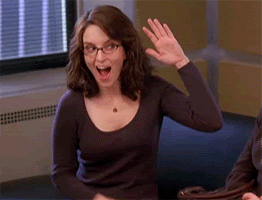

In [6]:
def rollavg_bottlneck(a,n):
    return bn.move_mean(a, window=n,min_count = None)



In [7]:
# The number of states in simply the number of "squares" in our grid world, in this case 4 * 12
num_states = 4 * 12
# We have 4 possible actions, up, down, right and left
num_actions = 4

q_values = np.zeros((num_states, num_actions))

In [8]:
def egreedy_policy(q_values, state, epsilon=0.1):
    ''' 
    Choose an action based on a epsilon greedy policy.    
    A random action is selected with epsilon probability, else select the best action.    
    '''
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        return np.argmax(q_values[state])

In [9]:
def q_learning(env, num_episodes=500, render=True, exploration_rate=0.1,
               learning_rate=0.5, gamma=0.9):    
    q_values = np.zeros((num_states, num_actions))
    ep_rewards = []
    
    for i in range(num_episodes):
        state = env.reset()    
        done = False
        reward_sum = 0
        if i>950:
         exploration_rate=exploration_rate*0.99
        
        # print(exploration_rate)

        while not done:            
            # Choose action        
            action = egreedy_policy(q_values, state, exploration_rate)
            # Do the action
            next_state, reward, done, info = env.step(action)
            reward_sum += reward
            # Update q_values       
            td_target = reward + gamma * np.max(q_values[next_state])
            td_error = td_target - q_values[state][action]
            q_values[state][action] += learning_rate * td_error
            # Update state
            state = next_state


            
        ep_rewards.append(reward_sum)
    
    return ep_rewards, q_values

In [10]:
def sarsa(env, num_episodes=500, render=True, exploration_rate=0.1,
          learning_rate=0.5, gamma=0.9):
    q_values_sarsa = np.zeros((num_states, num_actions))
    ep_rewards = []
    
    for i in range(num_episodes):
        state = env.reset()    
        done = False
        reward_sum = 0
        if i>950:
         exploration_rate=exploration_rate*0.99
        # print(exploration_rate)
        # Choose action        
        action = egreedy_policy(q_values_sarsa, state, exploration_rate)

        while not done:        
            # Do the action
            next_state, reward, done, info = env.step(action)
            reward_sum += reward
            
            # Choose next action
            next_action = egreedy_policy(q_values_sarsa, next_state, exploration_rate)
            # Next q value is the value of the next action
            td_target = reward + gamma * q_values_sarsa[next_state][next_action]
            td_error = td_target - q_values_sarsa[state][action]
            # Update q value
            q_values_sarsa[state][action] += learning_rate * td_error

            # Update state and action        
            state = next_state
            action = next_action
            

                
        ep_rewards.append(reward_sum)
        
    return ep_rewards, q_values_sarsa

In [11]:
q_learning_rewards, q_values = q_learning(env,num_episodes=500, gamma=1, learning_rate=0.4)

In [12]:
sarsa_rewards, q_values_sarsa = sarsa(env,num_episodes=500, learning_rate=0.4, gamma=1)

In [13]:
q_learning_rewards_ma=rollavg_bottlneck(q_learning_rewards, 100)
sarsa_rewards_ma=rollavg_bottlneck(sarsa_rewards, 100)

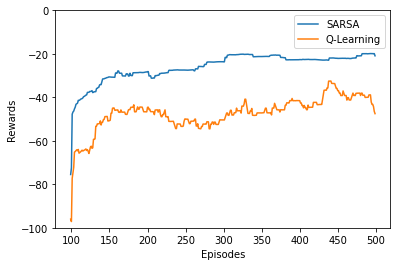

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
plt.ylim(-100,0)
ax.plot(sarsa_rewards_ma, label='SARSA')
ax.plot(q_learning_rewards_ma, label='Q-Learning')
plt.legend()
plt.show()


In [694]:
env.render()